# Data Exploration

In [2]:
%pip install -r requirements.txt
# %pip install pydantic<2.0.0

                                              0.0/357.8 kB ? eta -:--:--
     -----------                            112.6/357.8 kB 2.2 MB/s eta 0:00:01
     ---------------------------            256.0/357.8 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 357.8/357.8 kB 2.5 MB/s eta 0:00:00
                                              0.0/102.7 kB ? eta -:--:--
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/667.1 kB ? eta -:--:--
     -----------------                      307.2/667.1 kB 6.3 MB/s eta 0:00:01
     ------------------------------         532.5/667.1 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 667.1/667.1 kB 5.3 MB/s eta 0:00:00
                                              0.0/296.5 kB ? eta -:--:--
     ------------------------------------   28

In [44]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
a = pd.read_csv("./BankA.csv")
b = pd.read_csv("./BankB.csv")
c = pd.read_csv("./BankC.csv")

In [5]:
a_samp = a.sample(n=100)
b_samp = b.sample(n=100)
c_samp = c.sample(n=100)

# a_b_samp = a_samp.append(b_samp, ignore_index=True)
# all_samp = a_b_samp.append(c_samp, ignore_index=True)

all_samp = pd.concat([a_samp, b_samp, c_samp], ignore_index=True)

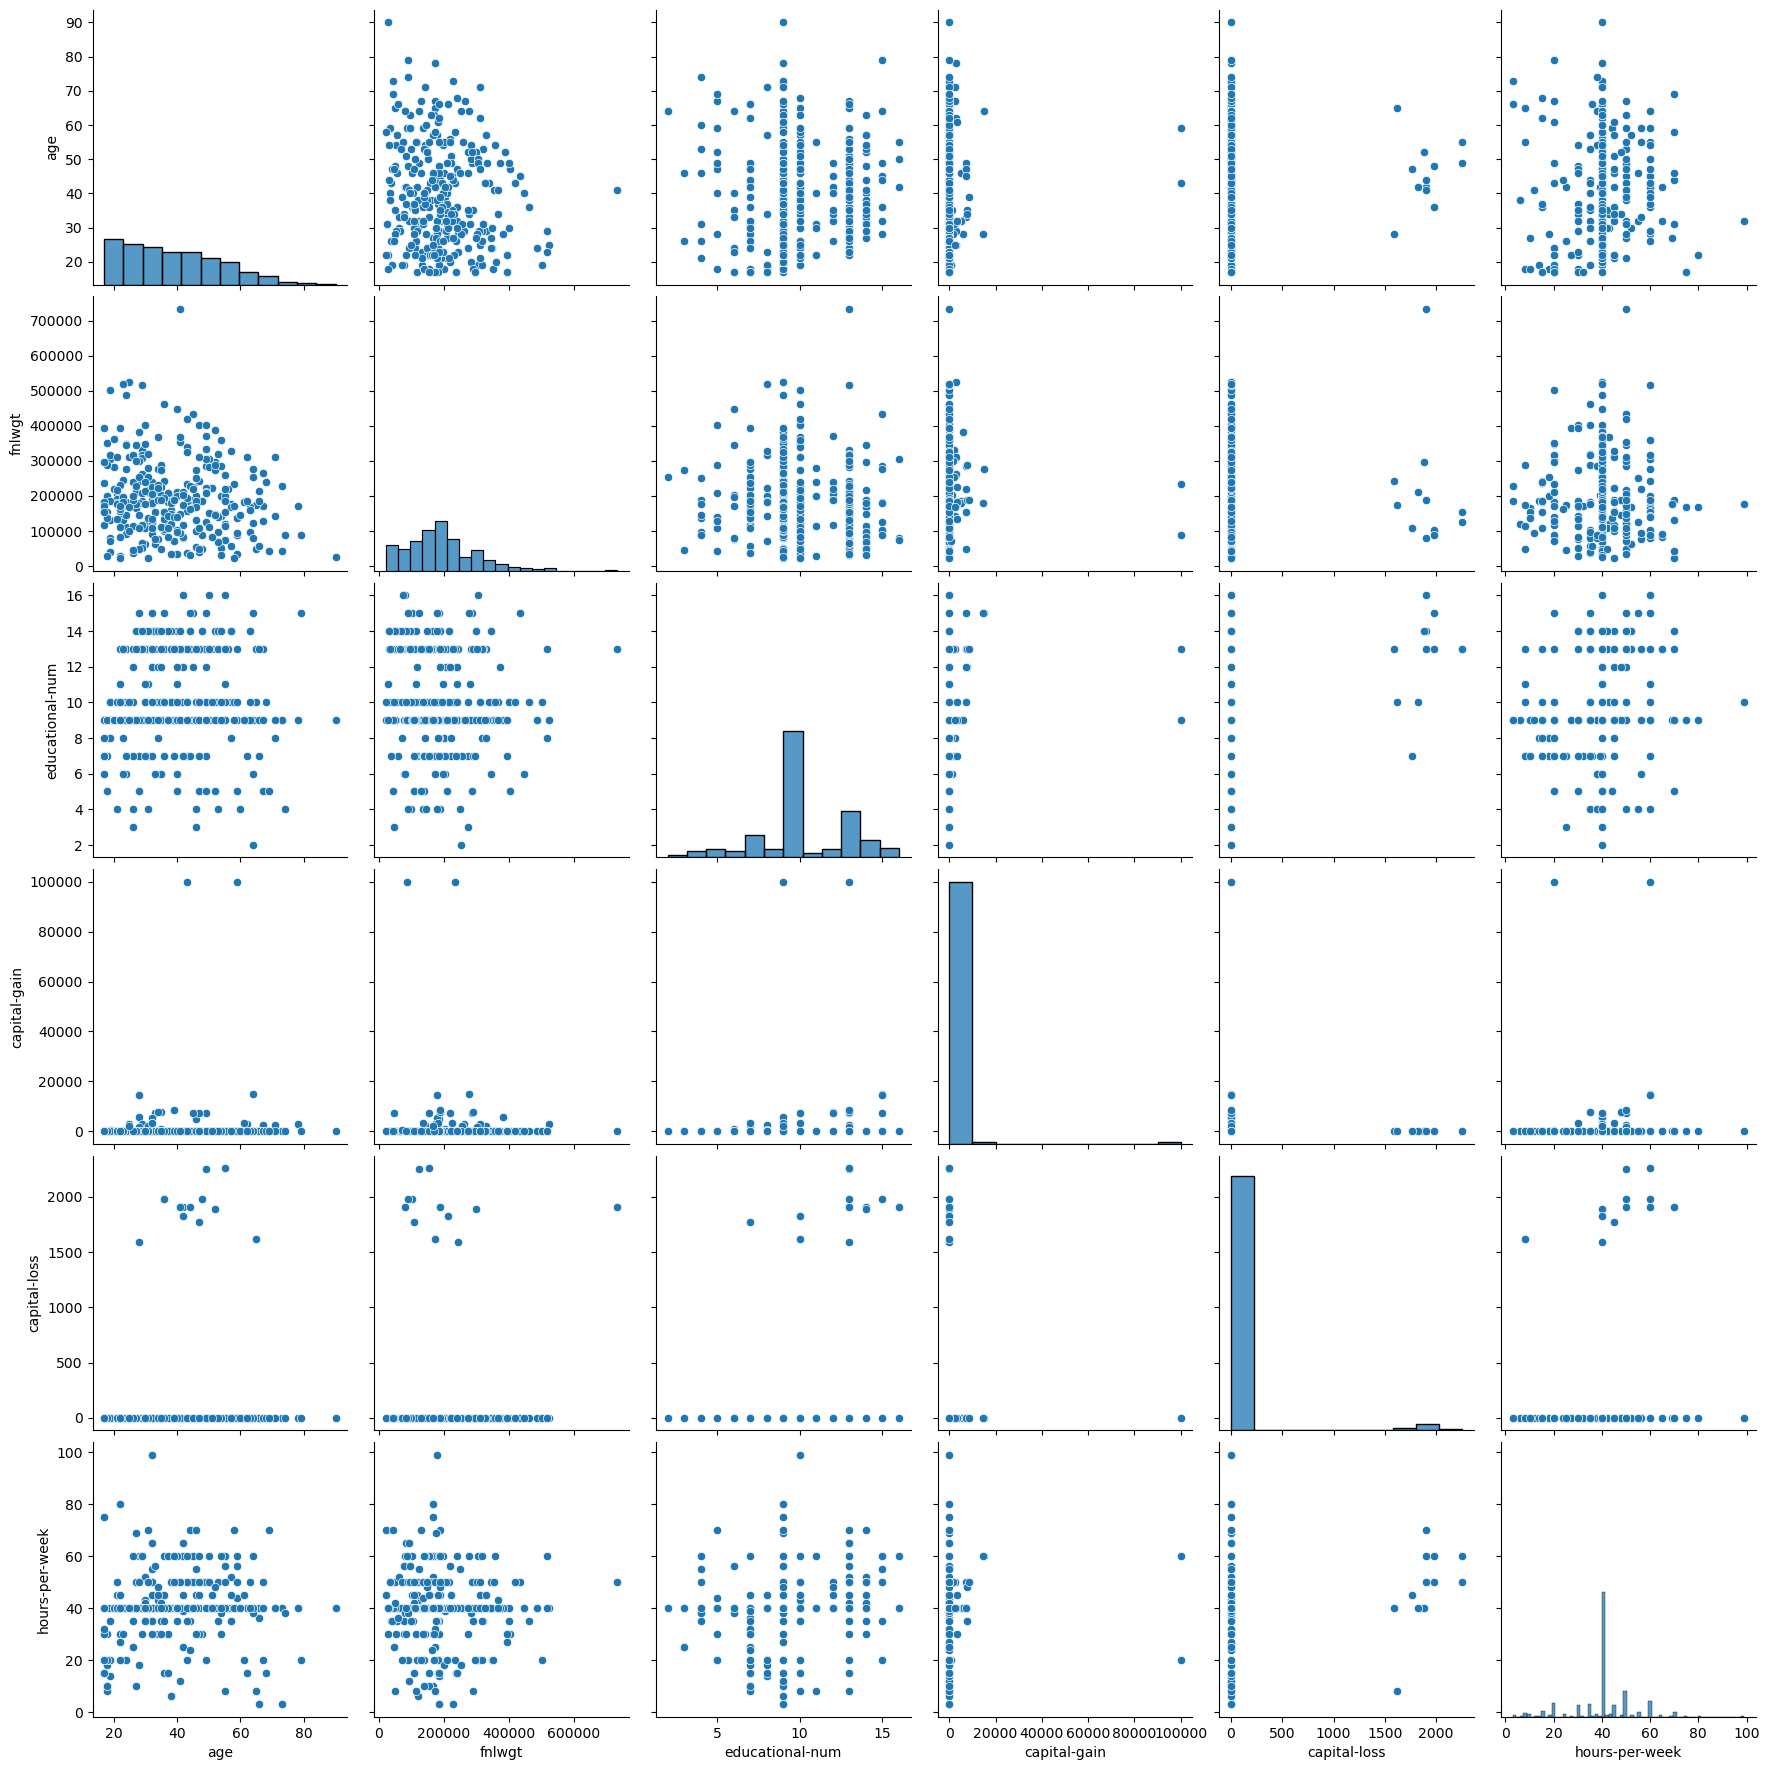

In [6]:
sns.pairplot(all_samp, height=3);

In [7]:
profile = ProfileReport(all_samp, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
all_samp.head(3)

,institute,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Bank A,57,Private,177448,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,Bank A,48,Private,48672,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,Bank A,31,Private,279657,Assoc-voc,11,Never-married,Other-service,Unmarried,White,Female,0,0,40,?,<=50K


In [ ]:
# Native Country (Rassistisch?)
# Gender (sexismus)
# Race (Rassistisch!)
# Relationship (Husband, Wife einfach zu Married?)
# Educational-num oder education weg, je nach dem ob one hot encoding oder nicht

In [9]:
df = pd.concat([a, b, c], ignore_index=True)

In [11]:
drop_this = ["institute","education","race","gender","native-country"]
df = df.drop(drop_this, axis = 1)

In [12]:
df.loc[df["relationship"].isin(["Husband", "Wife"]), "relationship"] = "Married"

In [17]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
income             object
dtype: object

In [22]:
df = pd.get_dummies(df, columns=["workclass", "marital-status", "occupation", "relationship"])

In [23]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried
0,39,208353,13,7298,0,50,>50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,42,189986,13,0,0,55,>50K,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,56,321827,13,0,0,15,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,34,33945,13,0,0,40,<=50K,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,66,31438,13,15024,0,40,>50K,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [28]:
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# Modelle für Klassifikation
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

# Evaluation Metriken für Klassifikation
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Cohen\'s Kappa': []}

# Modellentwicklung und Evaluation
for model_name, model in models.items():
    # Modell anpassen
    model.fit(X_train, y_train)
    
    # Vorhersagen
    predictions = model.predict(X_test)
    
    # Metriken
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='>50K')
    recall = recall_score(y_test, predictions, pos_label='>50K')
    f1 = f1_score(y_test, predictions, pos_label='>50K')
    kappa = cohen_kappa_score(y_test, predictions)
    
    # Ergebnisse speichern
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Cohen\'s Kappa'].append(kappa)
    
    # Metriken anzeigen
    print("Klassifikationsbericht:\n", classification_report(y_test, predictions))
    print(f"{model_name}\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nCohen's Kappa: {kappa:.2f}\n{'='*40}")

# Ergebnisse in ein DataFrame konvertieren, um sie besser zu visualisieren
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87    120205
        >50K       0.71      0.27      0.39     39795

    accuracy                           0.79    160000
   macro avg       0.75      0.62      0.63    160000
weighted avg       0.78      0.79      0.75    160000

Logistic Regression
Accuracy: 0.79
Precision: 0.71
Recall: 0.27
F1 Score: 0.39
Cohen's Kappa: 0.29
Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87    120205
        >50K       0.61      0.62      0.61     39795

    accuracy                           0.81    160000
   macro avg       0.74      0.74      0.74    160000
weighted avg       0.81      0.81      0.81    160000

Decision Tree
Accuracy: 0.81
Precision: 0.61
Recall: 0.62
F1 Score: 0.61
Cohen's Kappa: 0.48
Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.88 

,Model,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
3,Gradient Boosting,0.858187,0.784694,0.592361,0.675096,0.586646
2,Random Forest,0.841025,0.709077,0.611861,0.656892,0.554165
1,Decision Tree,0.806288,0.609299,0.616434,0.612846,0.483680
0,Logistic Regression,0.790094,0.705656,0.267722,0.388173,0.291197


In [48]:
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Für binäre Klassifikation

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trainieren des Modells
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Bewertung des Modells
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
20000/20000 [==============================] - 41s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
20000/20000 [==============================] - 61s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
 9122/20000 [============>.................] - ETA: 24s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: 